In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from sentence_transformers import util


import skillsnetwork

sns.set_context('notebook')
sns.set_style('white')

ModuleNotFoundError: No module named 'skillsnetwork'

In [6]:
!pip install -U sentence-transformers
!pip install scikit-learn 

You should consider upgrading via the 'C:\Users\adity\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\adity\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
def plotter(x, y, title):
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

In [4]:
sentences = ['This framework generates embeddings for each input sentence',
            'Sentences are passed as a list of string.',
            'The quick brown fox jumps over the lazy dog.']

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [13]:
embeddings = model.encode(sentences, convert_to_numpy=True) # By default, convert_to_numpy = True
embeddings.shape

(3, 384)

In [14]:
embeddings[0][:50]

array([-0.01371735, -0.04285156, -0.01562864,  0.01405376,  0.03955383,
        0.12179632,  0.02943333, -0.0317524 ,  0.03549598, -0.07931396,
        0.01758786, -0.04043696,  0.04972595,  0.02549128, -0.07187007,
        0.08149689,  0.00147069,  0.0479628 , -0.04503363, -0.09921751,
       -0.02817697,  0.06450464,  0.04446701, -0.04762175, -0.03529522,
        0.04386716, -0.05285659,  0.00043299,  0.10192145,  0.01640726,
        0.03269958, -0.03459869,  0.01213393,  0.07948712,  0.00458342,
        0.0157778 , -0.00968205,  0.02876258, -0.05058063, -0.01557935,
       -0.02879067, -0.00962281,  0.03155562,  0.0227349 ,  0.08714499,
       -0.03850273, -0.08847184, -0.00875496, -0.02123433,  0.02089241],
      dtype=float32)

In [15]:
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

embeddings = model.encode(sentences, convert_to_numpy=True) 

In [16]:
def cosine_similarity(a, b):
    
    score = np.dot(a, b) / (norm(a) * norm(b))
    
    return score

In [17]:
cosine_similarity(embeddings[0], embeddings[1])

0.036330357

In [18]:
cosine_similarity(embeddings[3], embeddings[6])

0.89390385

In [19]:
cosine_scores = util.cos_sim(embeddings, embeddings)
cosine_scores.shape

torch.Size([8, 8])

In [20]:
pairs = []

for i in range(len(cosine_scores)-1): # 0, 1, 2, 3, 4, 5, 6
    for j in range(i+1, len(cosine_scores)): # 1-7, 2-7, 3-7, 4-7, 5-7, 6-7, 7
        pairs.append({'index': [i,j], 'score': cosine_scores[i][j]})
        
len(pairs)

28

In [21]:
sorted_pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in sorted_pairs[0:3]:
    i, j = pair['index']
    print(f"{sentences[i]} | {sentences[j]} \n Score: {pair['score']:.2f} \n")

The new movie is awesome | The new movie is so great 
 Score: 0.89 

The cat sits outside | The cat plays in the garden 
 Score: 0.68 

I love pasta | Do you like pizza? 
 Score: 0.51 



In [22]:
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

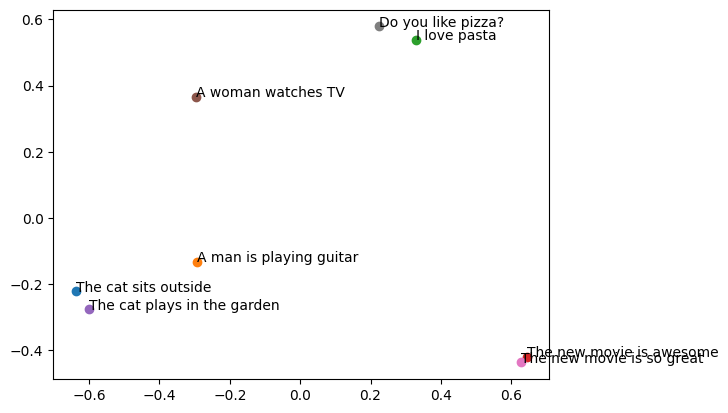

In [23]:
for coord, sentence in zip(embeddings_reduced, sentences):

    plt.scatter(coord[0], coord[1])
    plt.annotate(sentence, (coord[0], coord[1]))

In [30]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/data/perfume_data.tgz", overwrite=True)

FileNotFoundError: [Errno 2] No such file or directory: '\\tmp\\skills-network-3855824502117995614-perfume_data.tgz'

In [25]:
!pip install skillsnetwork

  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.7
    Uninstalling widgetsnbextension-4.0.7:
      Successfully uninstalled widgetsnbextension-4.0.7
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.7
    Uninstalling jupyterlab-widgets-3.0.7:
      Successfully uninstalled jupyterlab-widgets-3.0.7
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.0.6
    Uninstalling ipywidgets-8.0.6:
      Successfully uninstalled ipywidgets-8.0.6


You should consider upgrading via the 'C:\Users\adity\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [49]:
import skillsnetwork

In [36]:
import tarfile

In [51]:
tar_file_path = "C:/Users/adity/Downloads/perfume_data/perfume_data.tar"

In [54]:
tar = tarfile.open("C:/Users/adity/Downloads/perfume_data/perfume_data.tar")

In [55]:
tar.extractall()

In [56]:
tar.close()

In [57]:
df = pd.read_csv("./perfume_data.csv", encoding="unicode_escape")
df.head()

,ï»¿Name,Brand,Description,Notes,Image URL
0,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...
1,Almost Transparent Blue Eau de Toilette,A Lab on Fire,Almost Transparent Blue takes the classic ele...,"Lime, yuzu, thyme flower, aldehyde, hinoki, c...",https://static.luckyscent.com/images/products/...
2,And The World Is Yours Extrait de Parfum,A Lab on Fire,Few photographs capture the sumptuousness of ...,"Neroli, cumin, orange blossom absolute, rose,...",https://static.luckyscent.com/images/products/...
3,California Snow Eau de Parfum,A Lab on Fire,California Snow crackles with the electricity...,"Sage, tea, chamomile, coumarin, narcissus, ro...",https://static.luckyscent.com/images/products/...
4,Freckled and Beautiful Eau de Parfum,A Lab on Fire,There's no beauty quite like being young in t...,"Orange flower, neroli, honeysuckle, warm milk...",https://static.luckyscent.com/images/products/...


In [58]:
list(df.Notes[0:10])

[' Bergamot, almond, violet, jasmine, leather, sandalwood, vanilla, tonka',
 ' Lime, yuzu, thyme flower, aldehyde, hinoki, cedar wood, musk',
 ' Neroli, cumin, orange blossom absolute, rose, heliotrope, sandalwood, vanilla pod CO2,  tonka absolute, tolu balsam',
 ' Sage, tea, chamomile, coumarin, narcissus, rose, hay, cannabis, musk, soil tincture, vetiver, cedar',
 ' Orange flower, neroli, honeysuckle, warm milk, pastry, salicylates, sandalwood, vanilla bean, heliotrope',
 ' Ambrette, bergamot, pink pepper, violet, orris, iriseine, suede, blonde woods, musks',
 ' Juniper, mastic, black pepper, sea salt, clary sage, orris root, olibanum, solar accord, ambergris, vetiver, mineral musks, wet woods, ambrox, sea moss',
 ' Bergamot, lime, saffron, sage, lavender, Hinoki wood, incense, vanilla, musk',
 ' Safran, magnolia petals, Italian mandarin, jasmine sambac, tuberose, orange flower, cereal accord, orris, natural vanilla bean.',
 ' Bergamot, peach blossom, rose, heliotrope, musk, toffee, 

In [59]:
df.rename(columns={"ï»¿Name": "Name"}, inplace=True)
df['Name'] = df['Brand'] + " - " + df['Name']
df.drop(labels=['Description', 'Image URL', 'Brand'], axis=1, inplace=True)
df.head()

,Name,Notes
0,A Lab on Fire - A Blvd. Called Sunset Eau de P...,"Bergamot, almond, violet, jasmine, leather, s..."
1,A Lab on Fire - Almost Transparent Blue Eau de...,"Lime, yuzu, thyme flower, aldehyde, hinoki, c..."
2,A Lab on Fire - And The World Is Yours Extrait...,"Neroli, cumin, orange blossom absolute, rose,..."
3,A Lab on Fire - California Snow Eau de Parfum,"Sage, tea, chamomile, coumarin, narcissus, ro..."
4,A Lab on Fire - Freckled and Beautiful Eau de ...,"Orange flower, neroli, honeysuckle, warm milk..."


In [60]:
df.Notes.isnull().sum()

79

In [61]:
df.dropna(inplace = True)
df.reset_index(inplace=True, drop = True)
df.shape

(2097, 2)

In [62]:
words = ["Perfume Oil", "Extrait", "Travel", "Hair", "Body", "Hand", "Intense", "Intensivo", "Oil"] # check for these words in perfume names

index_to_drop = []
for index, name in enumerate(df.Name):
    if any(word.lower() in name.lower() for word in words):
        index_to_drop.append(index)

In [63]:
df.drop(index_to_drop, axis=0, inplace=True)
df.reset_index(inplace=True, drop = True)
df.shape

(1604, 2)

In [64]:
df.Notes = df.Notes.apply(lambda x: str(x))
notes = df.Notes.to_list()
len(notes)

1604

In [65]:
model = SentenceTransformer('all-MiniLM-L6-v2')

note_embeddings = model.encode(notes, show_progress_bar=True, batch_size=64)

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

In [66]:
print(note_embeddings.shape)

print(note_embeddings[0][:50]) # first 50 values in the embedding of "Vanilla bean, musks"

(1604, 384)
[-0.00536174 -0.08962226  0.03425573  0.07611445  0.04399084  0.09172302
  0.03116251 -0.05357344  0.01305529 -0.03158848  0.08101199 -0.05667508
 -0.02744407 -0.07322728  0.03848419  0.05993799  0.1101388   0.02569334
 -0.03124173  0.00807242  0.01832662 -0.00012893  0.00550093  0.02377415
  0.01978639  0.02632319  0.02199204 -0.00831315  0.00776821 -0.12470713
  0.03724478 -0.00188033  0.06668041  0.01159844 -0.05619041  0.01826878
 -0.07010398 -0.11917054  0.0631799   0.06150827 -0.01092714  0.00840747
 -0.00403328 -0.02480973 -0.01124479 -0.0303256   0.03361208  0.00046362
 -0.00190013  0.0766108 ]


In [67]:
cosine_scores = util.cos_sim(note_embeddings, note_embeddings)
cosine_scores.shape

torch.Size([1604, 1604])

In [68]:
pairs = []

for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({"index": [i,j], "score": cosine_scores[i][j]})

len(pairs)

1285606

In [69]:
sorted_pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in sorted_pairs[0:10]:
    i, j = pair['index']
    print(f"{df.iloc[i, 0]} | {df.iloc[j, 0]} \n Score: {pair['score']:.2f} \n")

Comme des Garcons - 2 Eau de Parfum | Comme des Garcons - 2 Candle 
 Score: 1.00 

Roja Parfums - Elysium Parfum Cologne | Roja Parfums - Vetiver Parfum Cologne 
 Score: 1.00 

Ormonde Jayne - Ormonde Elixir Parfum | Ormonde Jayne - Ormonde Woman Eau de Parfum 
 Score: 0.98 

PARFUMS DE NICOLAI - Incense Oud Eau de Parfum | PARFUMS DE NICOLAI - Oud Sublime Elixir de Parfum 
 Score: 0.97 

J-Scent - Hisui (Jade) Eau de Parfum | J-Scent - Shaft of Light Eau de Parfum 
 Score: 0.95 

Roja Parfums - Danger Parfum Cologne | Roja Parfums - Scandal Parfum Cologne 
 Score: 0.94 

Xerjoff - Oud Stars - Alexandria II Eau de Parfum | Xerjoff - Oud Stars - Alexandria III Parfum 
 Score: 0.94 

Charenton Macerations - Asphalt Rainbow Eau de Parfum | Charenton Macerations - Asphalt Rainbow Scratch & Sniff Sticker Set 
 Score: 0.94 

Ormonde Jayne - Ambre Royal Eau de Parfum | Ormonde Jayne - Royal Elixir Parfum 
 Score: 0.94 

Les Bains Guerbois - 2015 Le Phenix Eau de Parfum | Les Bains Guerbois - 

In [70]:
my_perfumes = pd.DataFrame([['Jo Malone - English Pear & Freesia', 'Pear, Melon, Freesia, Rose, Musk, Patchouli, Rhuburb, Amber'], 
                      ['Jo Malone - Myrrh & Tonka', 'Lavender, Myrrh, Tonka Bean, Vanilla, Almond'],
                      ['Jo Malone - Oud & Bergamot', 'orange, bergamot, lemon, cedar and oud.'],
                      ['Guerlain - Néroli Outrenoir', 'Petitgrain, Bergamot, Tangerine, Lemon, Grapefruit, Tea, Neroli, Orange Blossom, Smoke, Earthy Notes, Myrrh, Vanilla, Benzoin, Ambrette, Oakmoss.'],
                      ['Guerlain - Épices Volées', 'Coriander, Lemon, Artemisia, Bergamot, Clove, Cardamom, Sage, Bulgarian Rose, Sandalwood, Patchouli, Benzoin, Labdanum.'],
                      ['Guerlain - Aqua Allegoria Nerolia Vetiver Eau de Toilette', 'Basil, Vetiver, Fig Accord, Neroli'],
                      ['Chloe Eau de Parfum', 'Peony, Litchi, Freesia, Rose, Lily-of-the-Valley, Magnolia, Virginia Cedar, Amber.']                     
                     ],
                   columns=df.columns)

my_perfumes

,Name,Notes
0,Jo Malone - English Pear & Freesia,"Pear, Melon, Freesia, Rose, Musk, Patchouli, R..."
1,Jo Malone - Myrrh & Tonka,"Lavender, Myrrh, Tonka Bean, Vanilla, Almond"
2,Jo Malone - Oud & Bergamot,"orange, bergamot, lemon, cedar and oud."
3,Guerlain - Néroli Outrenoir,"Petitgrain, Bergamot, Tangerine, Lemon, Grapef..."
4,Guerlain - Épices Volées,"Coriander, Lemon, Artemisia, Bergamot, Clove, ..."
5,Guerlain - Aqua Allegoria Nerolia Vetiver Eau ...,"Basil, Vetiver, Fig Accord, Neroli"
6,Chloe Eau de Parfum,"Peony, Litchi, Freesia, Rose, Lily-of-the-Vall..."


In [71]:
notes = list(my_perfumes.Notes)

model = SentenceTransformer('all-MiniLM-L6-v2')
my_embeddings = model.encode(notes, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [72]:
cosine_scores = util.cos_sim(my_embeddings, note_embeddings)

In [74]:
my_pairs=[]

for i in range(cosine_scores.shape[0]):
    for j in range(cosine_scores.shape[1]):
        my_pairs.append({"index": [i,j], "score": cosine_scores[i][j]})
        
        
my_sorted_pairs = sorted(my_pairs, key=lambda x: x['score'], reverse=True)

In [75]:
for i in range(cosine_scores.shape[0]):

    print(f"Recommended for {my_perfumes.iloc[i, 0]}:")
    my_pairs = []
    for j in range(cosine_scores.shape[1]):
        my_pairs.append({"index": j, "score": cosine_scores[i][j]})
        my_sorted_pairs = sorted(my_pairs, key=lambda x: x['score'], reverse=True)
        
    for no, pair in enumerate(my_sorted_pairs[:5]):
        print(f" {no+1}. {df.iloc[pair['index'], 0]} (Score: {pair['score']:.2f})")
    print("\n")

Recommended for Jo Malone - English Pear & Freesia:
 1. Alexandre. J - Silver Ombre Eau de Parfum (Score: 0.80)
 2. Montale - Starry Nights Eau de Parfum (Score: 0.79)
 3. BDK Parfums - Bouquet de Hongrie Eau de Parfum (Score: 0.79)
 4. Jovoy Paris - Psychedelique Eau de Parfum (Score: 0.79)
 5. L'Artisan Parfumeur - Champ de Fleurs Eau de Cologne (Score: 0.78)


Recommended for Jo Malone - Myrrh & Tonka:
 1. Parfum d'Empire - Fougere Bengale Eau de Parfum (Score: 0.86)
 2. Tauer Perfumes - Une Rose Vermeille Eau de Parfum (Score: 0.84)
 3. Xerjoff - 1861 - Naxos Eau de Parfum (Score: 0.83)
 4. PARFUMS DE NICOLAI - Amber Oud Eau de Parfum (Score: 0.83)
 5. Reims Parfums - L'Eau des Sacres (Score: 0.80)


Recommended for Jo Malone - Oud & Bergamot:
 1. Comme des Garcons: Cologne - Citrico (Score: 0.85)
 2. The House Of Oud - Cypress Shade Eau de Parfum (Score: 0.76)
 3. Xerjoff - Blue Hope Eau de Parfum (Score: 0.76)
 4. L'Artisan Parfumeur - Au Bord De L'Eau Eau de Cologne (Score: 0.76